***Analytical solution of Einstein equation***

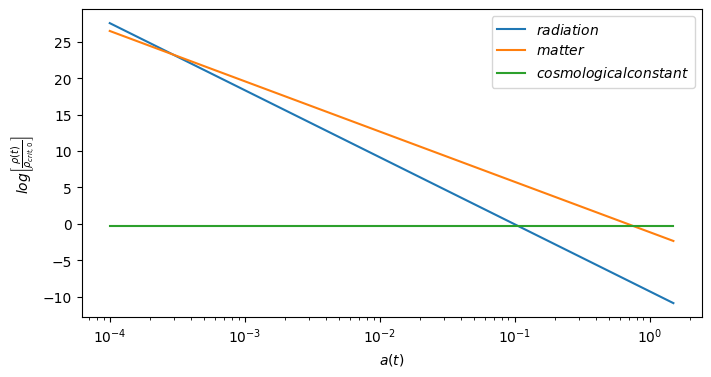

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def log_rho_rhoc_radiation(a):
    return -4*np.log(a) + np.log(9.4e-5)

def log_rho_rhoc_matter(a):
    return -3*np.log(a) + np.log(0.32)

def log_rho_rhoc_de(a):
    return math.log(0.7)*np.ones(100)

a = np.linspace(1e-4, 1.5, 100)

fig = plt.figure(figsize=(8, 4))

plt.semilogx(a,log_rho_rhoc_radiation(a), label=r'$radiation$')
#plt.plot(a,log_rho_rhoc_radiation(a), label=r'$radiation$')
plt.semilogx(a,log_rho_rhoc_matter(a), label=r'$matter$')
plt.semilogx(a,log_rho_rhoc_de(a), label=r'$cosmological constant$')


#plt.ylim(-5,15)
plt.xlabel(r'$a(t)$')
plt.ylabel(r'$log\left[\frac{\rho(t)}{\rho_{crit,0}}\right]$')
plt.legend();

***Numerical solution of Einstein equation***

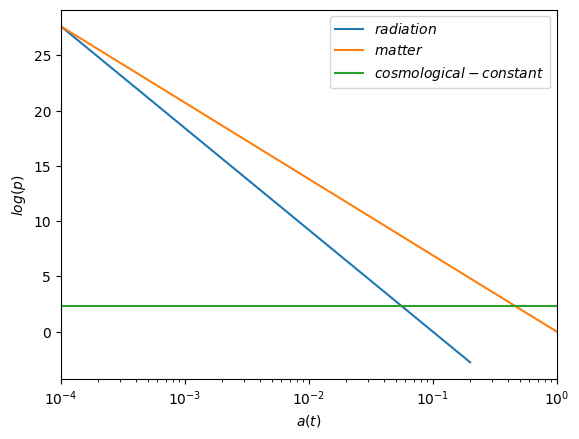

In [9]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

def cde(var,t, w):
    
    G = 6.67e-11
    
    
    # Assigen each ode as a vector 
    
    a = var[0]
    p = var[1]
    U = var[2]
    
    
    #define each ODE
    #dadt = U
    dadt = a*((8*np.pi*G*p*1e10)/3)**(1/2) #here I have multiplied by 10^(10) inside the squaroot for scaling
    dpdt = -3*((8*np.pi*G*p*1e10)/3)**(1/2)*p*(1+w)/3 #here I have divided the whole equation by 3 and multiplied by 10^(10) inside the squaroot for scaling
    dUdt = -4*a*np.pi*G*p*1e10*(1+3*w) #here I have multiplied by 10^(10) inside the squaroot for scaling
    
    return[dadt,dpdt,dUdt]
#initial conditions
var0=[1e-4,1e4,100]



#declare a time vector(time window)
t = np.linspace(0,1,1000)
soln_conc_0 = odeint(cde,var0,t, args=(0,))
soln_conc_1 = odeint(cde,var0,t, args=(-1,))
soln_conc_13 = odeint(cde,var0,t, args=(1/3,))




#plt.figure(figsize=(10, 8), layout='constrained')
#plt.semilogx(t, soln_conc[:,0], label='a') 
#plt.semilogx(t, soln_conc[:,1], label='p')  # etc.
#plt.semilogx(t, soln_conc[:,2], label='U')
plt.semilogx(soln_conc_13[:,0],3*np.log(soln_conc_13[:,1]),  label=r'$radiation$')
plt.semilogx(soln_conc_0[:,0],3*np.log(soln_conc_0[:,1]),  label=r'$matter$') 
plt.semilogx(soln_conc_1[:,0],np.log(soln_conc_1[:,1]*1e-3),  label=r'$cosmological-constant$')
plt.xlim(1e-4, 1)

plt.xlabel(r'$a(t)$')
plt.ylabel(r'$log(p)$')
#plt.title(r'$\rho- a$')
plt.subplot()
plt.legend();
plt.show()

